<h1 align="center">**Random Forest**</h1>

## Program so far
***
- Basics of Python
- Descriptive and Inferential Statistics
- Linear Regression
- L1/L2 Regularization
- Basic data cleaning and Preprocessing
- Feature extraction and Feature engineering
- Feature selection
- Logistic Regression
- Decision trees

# Content
***
- Shortcomings of Decision trees
- Introducing Random Forests
- Hyperparameters for Random Forests
- Optimal Parameters & Model Fitting 
- Predicting Loan Outcome 
*****

## Revisiting Decision Trees 
***
- We went through the shortcomings of decision trees
    - They overfit
    - They are structurally unstable since we need to find the optimal hyper-parameters in order to interpret the result
    
    
- Therefore, by using a greater number of Trees a.k.a a "Forest", we can get a better fitting model and prediction

<img src="../images/Concept-Alert.png" alt="Concept-ALert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Random Forest 
***
- In Random Forest, we learnt that 'bagging' is used to create multiple Decision Trees with minimal correlation

- In bagging, a random subset of the training data is selected to train each tree

- Furthermore, the model randomly restricts the variables which may be used at the splits of each tree. Hence, the trees grown are dissimilar, but they still retain certain predictive power.

- Let's build our intuition through an easy example.

## Example - People's first preference of Entertainment
***
 - A random sample of people were given 3 options when asked what their prefered source of entertainment were. These options were :


 1. Watching TV/Movies Online and at home (Netflix, etc) 
 2. Going to the Movie Theaters 
 3. Watching a live Play 

## Entertainment
***
- The information (variables) available in the dataset for each individual is the following:

1. Age , 2. Gender,  3. Highest educational qualification, 4. Working in Industry, 5. Residence in Metro/Non-metro

We need to come up with an algorithm to give an accurate prediction for an individual who has following traits:

1. Age : 35 years , 2, Gender : Male , 3. Highest Educational Qualification : Diploma holder, 4. Industry : Manufacturing, 5. Residence : Metro

We will only talk about random forest to make this prediction in our example

<img src="../images/Concept-Alert.png" alt="Concept-ALert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## How the RF Algorithm works
*** 
 - Deviating from our example, say, we have a random 1000 observations of Mexicans with 10 variables
 
 - Random forest tries to build multiple CART models with different samples and different initial variables. 
 
 - For instance, it will take a random sample of 100 observation and 5 randomly chosen initial variables to build a CART model 
 
 - It will repeat the process (say) 10 times and then make a final prediction on each observation
 
 - **Final prediction is a function of each prediction. This final prediction can simply be the mean of each prediction**

## Back to Entertainment
*** 
 - Say, the algorithm Random forest picks up 10,000 observations with only one variable (for simplicity) to build each CART model. In total, we are looking at 5 CART model being built with different variables.

- Remember: we have 5 variables in this dataset as described in the previous slides

- In a real life problem, you will have more number of population sample and different combinations of  input variables. Let's have a look at the salary bands again:

## Back to Entertainment
***
 Salary bands :

 Band 1) Watching TV/Movies Online and at home (Netflix, etc) 
 
 Band 2) Going to the Movie Theaters 
 
 Band 3) Watching a live Play 

Following are the outputs of the 5 different CART models

***
#### Note: These are outputs from the dataset and have been arranged in Tabular format for easy comprehension

**CART 1: VARIABLE AGE**
***
![](../images/rf3.png)

**CART 2: Variable Gender**
***
![](../images/rf4.png)

**CART 3: Variable Education**
***
![](../images/rf5.png)

**CART 4: Variable Residence**
***
![](../images/rf6.png)

**CART 5: Variable Industry**
***
![](../images/rf7.png)

## Entertainment 
***
Using these 5 CART models, we need to come up with set of probabilities that belong to each of the classes.

- For simplicity, we will just take a mean of probabilities in this case study. 

- Other than simple mean, we also consider vote method to come up with the final prediction. To come up with the final prediction let’s locate the following profile in each CART model :

    

 1. Age : 35 years 
 
 2. Gender : Male 
 
 3. Highest Educational Qualification : Diploma holder
 
 4. Industry : Manufacturing
 
 5. Residence : Metro

For each of these CART model, following is the distribution across entertainment bands :
***
![](../images/rf8.png)

 - The final probability is simply the average of the probability in the same salary bands in different CART models
 
 - As you can see from this analysis, that there is 70% chance of this individual falling in class 1 (Watching TV/Movies Online at home using Netflix, etc) and around 24% chance of the individual falling in class 2 (Going to the Movie Theater)

## Wisdom of the Crowd 
***
 - A random forest is an example of an ensemble, which is a combination of predictions from different models.
 
 - In an ensemble, predictions could be combined either by majority-voting or by taking averages.
 
 - Provided in the next slide is an illustration of how an ensemble formed by majority-voting yields more accurate predictions than the individual models it is based on:

#### Note: The illustration below is a GIF not an image. Please see the whole image

![](../images/rf2.gif)

## Random Forest In Python

In [19]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer,mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [20]:
# Reading data & seperating it into train and test
# Splitting the data into training and target set

dataframe = pd.read_csv('../data/loan_prediction.csv')
X = dataframe.iloc[:,0:4]
y = dataframe.iloc[:,4]
np.random.seed(9)
            
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

-Let's start with the  Loan Prediction dataset by first, creating 2 Random Forest models with different parameters

**One with min_samples_leaf set to 2**

**One with max_depth set to 5**

In [21]:
#model for tuning the min samples of leaf
clf_1 = RandomForestClassifier(min_samples_leaf=2, random_state=9)
clf_1.fit(X_train,y_train)

#model for tuning the max depth
clf_2 = RandomForestClassifier(max_depth = 5, random_state=9)
clf_2.fit(X_train,y_train)

C:\Users\rusha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rusha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=9, verbose=0, warm_start=False)

In [22]:
# predicting for min_samples 0f leaf as 2.
y_clf_1 = clf_1.predict(X_test)

# predicting for max depth 5.
y_clf_2 = clf_2.predict(X_test)

In [23]:
#calculate accuracy and roc auc score for min leaf samples

accuracy_clf_1 = accuracy_score(y_test, y_clf_1)
auc_roc1 = roc_auc_score(y_test, y_clf_1)
print("Accuracy score of the model with min sample leaf 2 is: {}".format(accuracy_clf_1))
print("roc_auc_score of the model1 is: {}".format(auc_roc1))

print("\n")

#calculate accuracy and roc auc score for max depth 5

accuracy_clf_2 = accuracy_score(y_test,y_clf_2)
auc_roc2 = roc_auc_score(y_test, y_clf_2)
print("Accuracy score of the model with max depth 5 is: {}".format(accuracy_clf_2))
print("roc_auc_score of the model2 is: {}".format(auc_roc2))


Accuracy score of the model with min sample leaf 2 is: 0.7189189189189189
roc_auc_score of the model1 is: 0.4794487427466151


Accuracy score of the model with max depth 5 is: 0.7675675675675676
roc_auc_score of the model2 is: 0.5113636363636364


## Variation in the performance of the model
***
- In the above code we used 2 different parameters for checking the performance of the models

- The variation in the **accuracy** and the **roc_auc score** of the models indicates the increase in the performance of the model by tweaking the parameters

<img src="../images/Concept-Alert.png" alt="Concept-ALert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## The main weaknesses of using a random forest are:
***
They're difficult to interpret 
- Because we've averaging the results of many trees, it can be hard to figure out why a random forest is making predictions the way it is.
- They take longer to create - Making two trees takes twice as long as making one, making three takes three times as long, and so on. 
- Let's look into this further

## `n_jobs` saves the day 
***
-  Fortunately, we can exploit multicore processors to parallelize tree construction

- Scikit allows us to do this through the n_jobs parameter on RandomForestClassifier

In-class Activity - See the performance by changing the **n_jobs** in parameters input to see the difference for parallel construction of trees

<img src="../images/Concept-Alert.png" alt="Concept-ALert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Deciding the number of trees to build 
***
* When we build a RandomForestClassifier, we pass in an **n_estimators** parameter that indicates **how many trees to build**

* While adding more trees usually improves accuracy, it also increases the overall time the model takes to train.

* RandomForestClassifier has a similar interface to DecisionTreeClassifier, and we can use the fit() and predict() methods to train and make predictions.

- More trees, in general, does lead to better predictions but *TOO MANY* trees don't necessarily improve the prediction

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Criterion to split the nodes
***
- **Criterion** is the function to measure the quality of a split. 
- Supported criteria are **“gini”** for the Gini impurity and **“entropy”** for the information gain. 
 
- We have studied these in detail in Decision Trees. If you need to, please go back and review how Trees are split based on these scores

<img src="../images/Concept-Alert.png" alt="Concept-ALert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Some Caution - Hyperparameters
***
- Random forests can still be prone to overfitting, though, so it's important to tune parameters like **maximum depth** and **minimum samples per leaf**

- We got an intuition behind n_jobs, no. of trees, and we already know about the Criterion used to split the trees

- ALL of these are treated as Hyperparameters and it's important to get optimal values since we want to fit the *BEST* possible model to our data! 


- Thus, we turned through tuning these hyperparameters through a process already known to us: **Grid Searching! **

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Hyper parameter tuning
***

* These are the hyperparameters that we are going to focus on tuning and get optimal values
***
     parameter = {
                'n_estimators': [ ], 
                  'max_features': [], 
                  'criterion': [],
                  'max_depth': ,
                  'min_samples_split': [ ],
                  'min_samples_leaf': [ ] 
               } 
                 

#### Tweaking parameters can increase the accuracy of the forest. 
* These parameters apply to the individual trees in the model, and change how they are constructed. 


- We define a Grid Search Function.

In [24]:
# Defined a function for implementing hyper parameter tuning
def gridfunc(classifier, parameter, X_train, y_train):
        
    clf = classifier
    np.random.seed(9)
    parameters = parameter
    acc_scorer = make_scorer(accuracy_score)
    
    # Run the grid search
    grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
    grid_obj = grid_obj.fit(X_train, y_train)
    
    return grid_obj

In [25]:
#plot mean scores for a particular grid object

def hp_cv_scores(grid_obj):
    grid_obj.cv_results_
    mean_test_scores = grid_obj.cv_results_['mean_test_score']
    mean_train_scores = grid_obj.cv_results_['mean_train_score']
    plt.figure(figsize=(10,6))
    
    param_values =[str(x) for x in list(grid_obj.param_grid.items())[0][1]]
    x = np.arange(1, len(param_values)+1)
    
    plt.plot(x,mean_train_scores, c='r', label='Train set')
    plt.xticks(x,param_values)
    plt.plot(x,mean_test_scores,c='g', label='Test set')
    plt.xlabel(list(grid_obj.param_grid.items())[0][1])
    plt.ylabel('mean scores')
    plt.legend()
    plt.show()

In [26]:
classifier = RandomForestClassifier(random_state=9)

C:\Users\rusha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\rusha\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


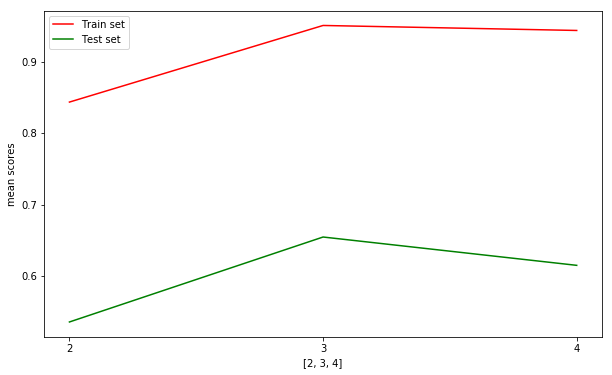

In [27]:
# plotting the graph to find the variation in model for given n_estimators -- NEEDS LEGEND

grid = gridfunc(classifier, {'n_estimators': [2, 3, 4]} , X_train, y_train)
hp_cv_scores(grid)

C:\Users\rusha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\rusha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rusha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rusha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rusha\Anaconda3\lib\s

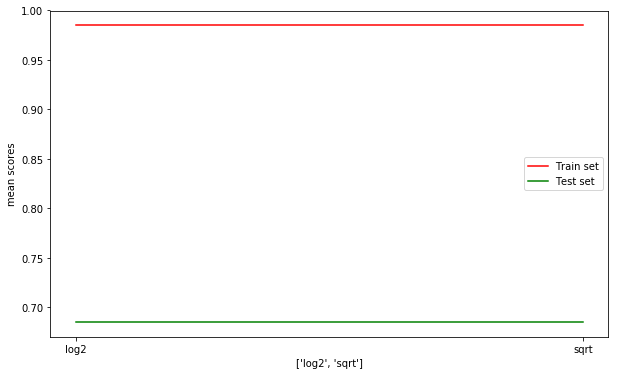

In [28]:
# plotting the graph to find the variation in model for given max features

grid = gridfunc(classifier,{'max_features': ['log2', 'sqrt']} , X_train, y_train)
hp_cv_scores(grid)

C:\Users\rusha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\rusha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rusha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rusha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rusha\Anaconda3\lib\s

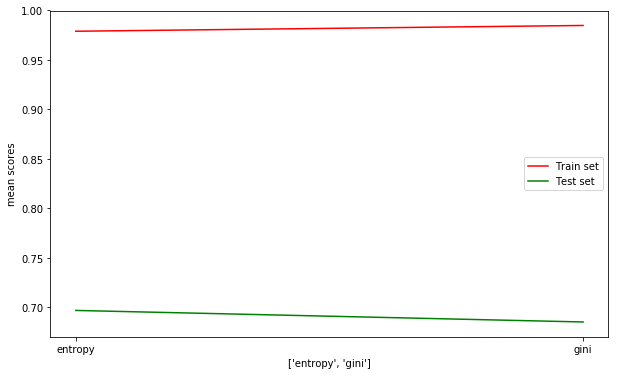

In [29]:
# plotting the graph to find the variation in model for given criterion

grid = gridfunc(classifier,{'criterion': ['entropy', 'gini']} , X_train, y_train)
hp_cv_scores(grid)

C:\Users\rusha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\rusha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rusha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rusha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rusha\Anaconda3\lib\s

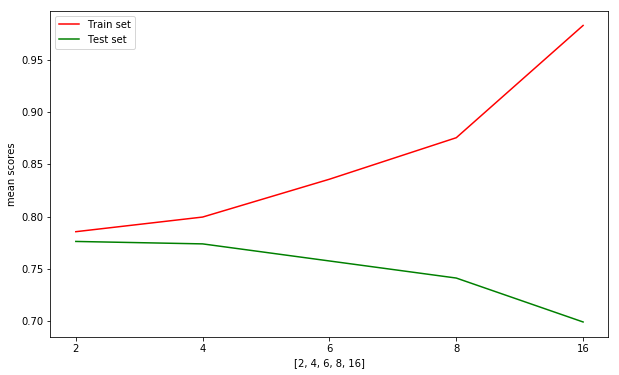

In [30]:
# plotting the graph to find the variation in model for given max depth

grid = gridfunc(classifier,{'max_depth': [2,4,6,8,16]} , X_train, y_train)
hp_cv_scores(grid)

C:\Users\rusha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\rusha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rusha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rusha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rusha\Anaconda3\lib\s

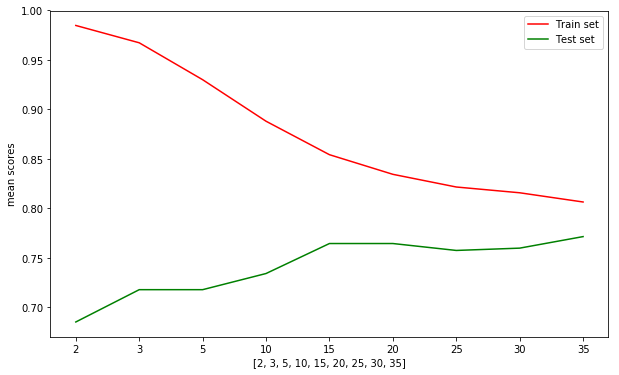

In [31]:
# plotting the graph to find the variation in model for given min samples split

grid = gridfunc(classifier,{'min_samples_split': [2, 3, 5, 10, 15,20,25,30,35]} , X_train, y_train)
hp_cv_scores(grid)

C:\Users\rusha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\rusha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rusha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rusha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rusha\Anaconda3\lib\s

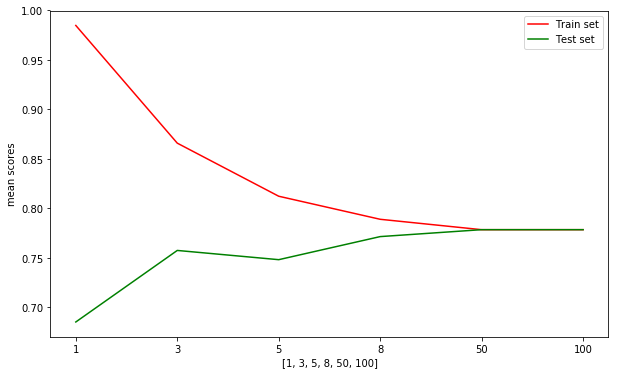

In [32]:
# plotting the graph to find the variation in model for given min samples leaf

grid = gridfunc(classifier,{'min_samples_leaf': [1,3,5,8,50,100]} , X_train, y_train)
hp_cv_scores(grid)

In [33]:
classifier = RandomForestClassifier(random_state=9)
parameter = {'n_estimators': [5,10,15], 
              'max_features': ['log2', 'sqrt'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2,4,6], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,3,5]
             }

In [34]:
#task find the results for the given params
grid = gridfunc(classifier, parameter, X_train, y_train)

C:\Users\rusha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [35]:
# Set the clf to the best combination of parameters
clf = grid.best_estimator_
    
# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=2, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=9, verbose=0, warm_start=False)

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Final overview
***
* Random Forest is a bagging algorithm with decision tree as base classifier/regressor
* The Random Forest algorithm introduces extra randomness when growing trees 
* Instead of searching for the very best feature when splitting a node it searches for the best feature among a random subset of features. 
* This results in a greater tree diversity, which trades a higher bias for a lower variance, generally yielding an overall better model. 

- Random Forests can be easily deployed in a distributed fashion due to the fact that they can run in parallel and for imbalanced data Random Forest stratifys the sampling.
- And it is true that they are more robust to overfitting and require less tuning to avoid it.

<img src="../images/Recap.png" alt="Recap" style="width: 100px;float:left; margin-right:15px"/>
<br />

# In-session Recap Time
***
* Decision Trees and their weakness
* Ensemble of decision trees
* Hyperparameter tuning of random forest

In [36]:
#Loading the house prices dataset for the mini-challenge
df = pd.read_csv('../data/house_prices.csv')
df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 1
LabelEncode the categorical features.

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 2
Split the features and target variable and then split the data into train and test.
The 'SalePrice' feature is the target variable.

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 3
Fit a RandomForest Regressor and tune the parameters using GridSearchCV.
Search for the best set of features amongst the following list of features and their value.
'n_estimators': [10,20,30],
'max_depth': [6,8],
'min_samples_split': [10,15],

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 4
Predict on the test data and calculate the mean-squared-error of your model.

# Thank You
***
### Next Session: Boosting Ensemble and XGBoost
For more queries - Reach out to academics@greyatom.com 